In [3]:
import pandas as pd
import numpy as np

In [ ]:
#Objective 1 Profile & QA the data
#Your first objective is to read in the AirBnB listings data
#Calculate basic profiling metrics, change column datatypes as necessary, and filter down to only Paris Listings.

In [38]:
listings = pd.read_csv(
    "/Users/huzaifamalik/Downloads/Python for Data Analytics/Data Analysis with Python & Pandas/Pandas Course Resources/Airbnb Data/Listings.csv",
encoding = "ISO-8859-1",
low_memory = False,
dtype = {"listing_id": "Int32", "host_id": "Int32", "accommodates": "Int8", "price": "Int32", 
         "minimum_nights": "Int16", "maximum_nights": "Int64"
        }
)

In [63]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [64]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  Int32         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  Int32         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [31]:
print(listings["listing_id"].max())
print(listings["host_id"].max())
print(listings["accommodates"].max())
print(listings["price"].max())
print(listings["minimum_nights"].max())
print(listings["maximum_nights"].max())

48343530
390187445
16
625216
9999
2147483647


In [62]:
listings["host_since"] = pd.to_datetime(listings["host_since"])

In [ ]:
#Filter the data down to rows where the city is Paris
#Keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’

In [232]:
paris_listings = (
    listings.query("city == 'Paris'")
.loc[:,["host_since", "neighbourhood", "city", "accommodates", "price"]]
)

In [233]:
paris_listings

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


In [ ]:
#QA the Paris listings data: check for missing values
#And calculate the minimum, maximum, and average for each numeric field

In [234]:
paris_listings.loc[
    paris_listings["accommodates"].isna() | paris_listings["price"].isna() | paris_listings["neighbourhood"].isna()
]

,host_since,neighbourhood,city,accommodates,price


In [267]:
paris_listings.loc[(paris_listings["accommodates"] == 0) | (paris_listings["price"] == 0)]

,host_since,neighbourhood,city,accommodates,price
98209,2020-07-20,Pantheon,Paris,0,0
203257,2020-02-04,Batignolles-Monceau,Paris,0,0
203258,2016-10-17,Opera,Paris,0,0
203259,2020-04-24,Luxembourg,Paris,0,0
203260,2020-04-24,Vaugirard,Paris,0,0
...,...,...,...,...,...
208881,2020-10-22,Pantheon,Paris,0,0
208882,2020-11-26,Enclos-St-Laurent,Paris,0,0
208883,2020-11-26,Vaugirard,Paris,0,0
208884,2020-12-21,Vaugirard,Paris,0,0


In [236]:
paris_listings_without_missing_values = (
    paris_listings.loc[(paris_listings["accommodates"] > 0) & (paris_listings["price"] > 0)]
)

In [237]:
paris_listings_without_missing_values

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


In [238]:
print(f"Minimum accommodates: {paris_listings_without_missing_values['accommodates'].min()}")
print(f"Maximum accommodates: {paris_listings_without_missing_values['accommodates'].max()}")
print(f"Average accommodates: {paris_listings_without_missing_values['accommodates'].mean()}")
print(f"Minimum price: {paris_listings_without_missing_values['price'].min()}")
print(f"Maximum price: {paris_listings_without_missing_values['price'].max()}")
print(f"Average price: {paris_listings_without_missing_values['price'].mean()}")

Minimum accommodates: 1
Maximum accommodates: 16
Average accommodates: 3.040601596831095
Minimum price: 8
Maximum price: 12000
Average price: 113.20494213034598


In [ ]:
#Objective 2 Prepare the data for visualization

In [ ]:
#Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' 
#And calculates the mean price (sorted low to high)

In [239]:
paris_listings_without_missing_values

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


In [240]:
paris_listings_without_missing_values["neighbourhood"].nunique()

20

In [241]:
paris_listings_neighbourhood = (
    paris_listings_without_missing_values.groupby("neighbourhood").agg({"price": "mean"})
    .sort_values("price", ascending = True)
)

In [242]:
paris_listings_neighbourhood

,price
neighbourhood,
Menilmontant,74.962204
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.233587
Reuilly,89.125566
Popincourt,90.588652
Gobelins,98.110184
Observatoire,101.989927
Batignolles-Monceau,102.683846
Enclos-St-Laurent,103.100822


In [ ]:
#Create a table named paris_listings_accomodations, 
#Filter down to the most expensive neighborhood, group by the ‘accommodations’ column, 
#And add the mean price for each value of ‘accommodates’ (sorted low to high)

In [243]:
paris_listings_neighbourhood

,price
neighbourhood,
Menilmontant,74.962204
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.233587
Reuilly,89.125566
Popincourt,90.588652
Gobelins,98.110184
Observatoire,101.989927
Batignolles-Monceau,102.683846
Enclos-St-Laurent,103.100822


In [244]:
most_expensive_neighbourhood_price = paris_listings_neighbourhood.values.max()

In [245]:
most_expensive_neighbourhood_price

np.float64(211.37365133446906)

In [246]:
paris_listings_neighbourhood.reset_index().loc[
    paris_listings_neighbourhood.reset_index()["price"] == most_expensive_neighbourhood_price
]

,neighbourhood,price
19,Elysee,211.373651


In [247]:
paris_listings_neighbourhood.reset_index().loc[
    paris_listings_neighbourhood.reset_index()["price"] == most_expensive_neighbourhood_price
].loc[:,"neighbourhood"]

19    Elysee
Name: neighbourhood, dtype: object

In [248]:
most_expensive_neighborhood_paris = paris_listings_neighbourhood.reset_index().loc[
    paris_listings_neighbourhood.reset_index()["price"] == most_expensive_neighbourhood_price
].loc[:,"neighbourhood"].values[0]

In [249]:
most_expensive_neighborhood_paris

'Elysee'

In [250]:
listings_most_expensive_neighbourhood_paris = (
    paris_listings_without_missing_values.query("neighbourhood == @most_expensive_neighborhood_paris")
)

In [251]:
listings_most_expensive_neighbourhood_paris

,host_since,neighbourhood,city,accommodates,price
2,2014-07-31,Elysee,Paris,2,89
14,2015-12-30,Elysee,Paris,2,35
128,2015-03-26,Elysee,Paris,2,75
137,2015-08-23,Elysee,Paris,2,90
260,2014-07-18,Elysee,Paris,2,110
...,...,...,...,...,...
278484,2016-07-22,Elysee,Paris,2,98
279043,2016-05-09,Elysee,Paris,2,75
279117,2014-11-20,Elysee,Paris,2,100
279299,2014-09-30,Elysee,Paris,2,87


In [252]:
paris_listings_accomodations = listings_most_expensive_neighbourhood_paris.pivot_table(
    index = "accommodates",
    values = "price",
    aggfunc = "mean"
).sort_values("price", ascending = True)

In [253]:
paris_listings_accomodations

,price
accommodates,
1,79.522222
3,153.882759
2,155.103352
4,212.09607
5,328.817073
6,355.508571
8,405.518519
7,411.538462
9,440.272727


In [ ]:
#Create a table called paris_listings_over_time grouped by the ‘host_since’ year, 
#and calculate the average price and count of rows representing the number of new hosts

In [254]:
paris_listings_without_missing_values["host_since"].dt.year.astype("Int32")

0         2011
1         2013
2         2014
3         2013
4         2014
          ... 
279707    2015
279708    2013
279709    2012
279710    2015
279711    2013
Name: host_since, Length: 64628, dtype: Int32

In [255]:
paris_listings_over_time = (
    paris_listings_without_missing_values
    .groupby(paris_listings_without_missing_values["host_since"].dt.year.astype("Int16"))
    .agg({"neighbourhood": "count", "price": "mean"})
)

In [256]:
paris_listings_over_time

,neighbourhood,price
host_since,,
2008,4,77.75
2009,106,159.641509
2010,416,125.03125
2011,1339,124.82823
2012,4592,111.578615
2013,8142,107.096414
2014,10922,100.2538
2015,12147,103.64625
2016,8867,114.211345


In [257]:
#verification 
paris_listings_without_missing_values.loc[
    paris_listings_without_missing_values["host_since"].dt.year == 2019
]

,host_since,neighbourhood,city,accommodates,price
75,2019-02-18,Buttes-Montmartre,Paris,2,115
91,2019-06-09,Buttes-Montmartre,Paris,2,45
99,2019-12-08,Louvre,Paris,2,300
177,2019-04-11,Reuilly,Paris,2,67
178,2019-04-10,Popincourt,Paris,2,113
...,...,...,...,...,...
279413,2019-03-06,Enclos-St-Laurent,Paris,2,100
279689,2019-04-16,Enclos-St-Laurent,Paris,2,80
279692,2019-05-03,Buttes-Chaumont,Paris,2,80
279698,2019-06-09,Passy,Paris,2,180


In [ ]:
#Objective 3 Visualize the data and summarize findings

In [ ]:
#Create a horizontal bar chart of the average price by neighborhood in Paris, 
#And make sure to add a title and change axis labels as needed

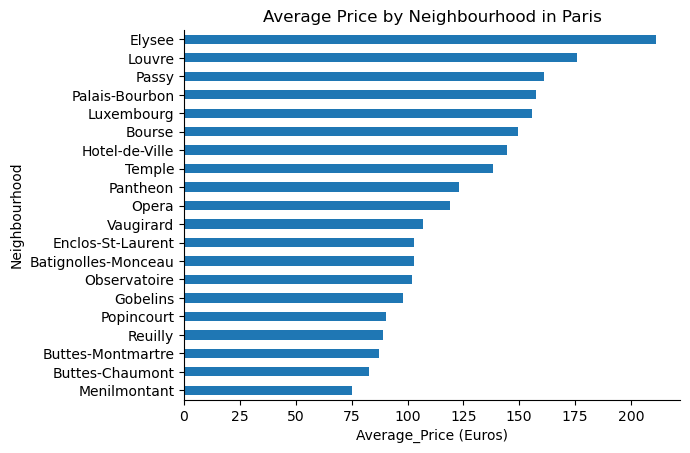

In [273]:
import seaborn as sns

paris_listings_neighbourhood.plot(
    kind = "barh",
    xlabel = "Average_Price (Euros)",
    ylabel = "Neighbourhood",
    title = "Average Price by Neighbourhood in Paris",
    legend = None
)

sns.despine();

In [ ]:
#Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, 
#And make sure to add a title and change axis labels as needed

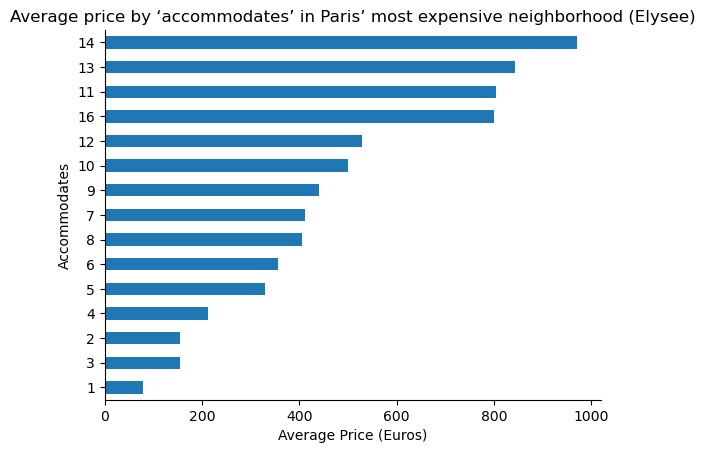

In [274]:
paris_listings_accomodations.plot(
    kind = "barh",
    xlabel = "Average Price (Euros)",
    ylabel = "Accommodates",
    title = "Average price by ‘accommodates’ in Paris’ most expensive neighborhood (Elysee)",
    legend = None
)

sns.despine()

In [ ]:
#Create two line charts: one showing the count of new hosts over time, 
#And one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed

In [260]:
paris_listings_over_time

,neighbourhood,price
host_since,,
2008,4,77.75
2009,106,159.641509
2010,416,125.03125
2011,1339,124.82823
2012,4592,111.578615
2013,8142,107.096414
2014,10922,100.2538
2015,12147,103.64625
2016,8867,114.211345


In [261]:
paris_listings_over_time.rename(
    columns = {"neighbourhood": "Number of Hosts", "price": "Average Price"}
)

,Number of Hosts,Average Price
host_since,,
2008,4,77.75
2009,106,159.641509
2010,416,125.03125
2011,1339,124.82823
2012,4592,111.578615
2013,8142,107.096414
2014,10922,100.2538
2015,12147,103.64625
2016,8867,114.211345


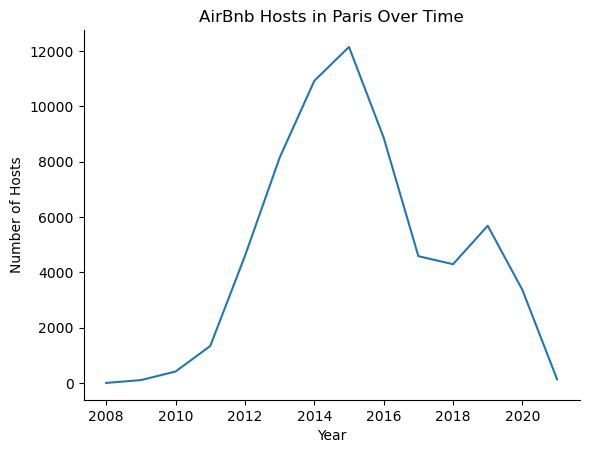

In [288]:
(
    paris_listings_over_time.rename(
        columns = {"neighbourhood": "Number of Hosts", "price": "Average Price"})
    .plot(
        y = "Number of Hosts", 
        xlabel = "Year",ylabel = "Number of Hosts", title = "AirBnb Hosts in Paris Over Time", 
        legend = None
    )
)
sns.despine();

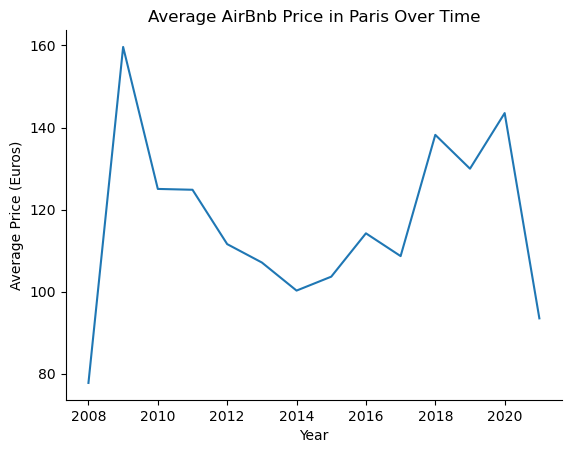

In [287]:
(
    paris_listings_over_time.rename(
        columns = {"neighbourhood": "Number of Hosts", "price": "Average Price"})
    .plot(
        y = "Average Price", 
        xlabel = "Year",ylabel = "Average Price (Euros)", title = "Average AirBnb Price in Paris Over Time", 
        legend = None
    )
)
sns.despine();

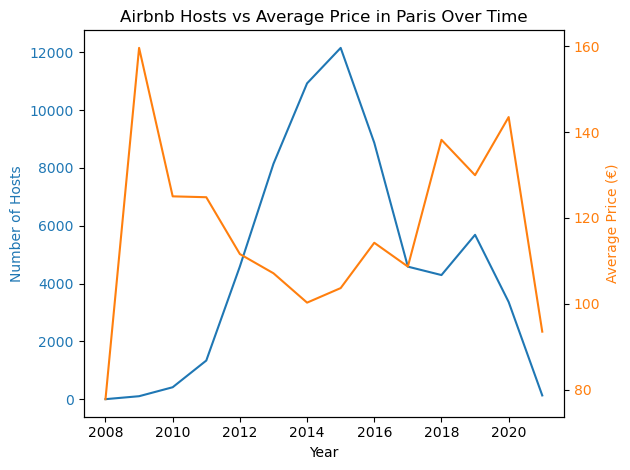

In [289]:
import matplotlib.pyplot as plt

# Rename columns for clarity
df = paris_listings_over_time.rename(
    columns={"neighbourhood": "Number of Hosts", "price": "Average Price"}
)

fig, ax1 = plt.subplots()

# Plot Number of Hosts on primary y-axis
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Hosts", color="tab:blue")
ax1.plot(df.index, df["Number of Hosts"], color="tab:blue", label="Number of Hosts")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Plot Average Price on secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel("Average Price (€)", color="tab:orange")
ax2.plot(df.index, df["Average Price"], color="tab:orange", label="Average Price")
ax2.tick_params(axis="y", labelcolor="tab:orange")

# Title and layout
plt.title("Airbnb Hosts vs Average Price in Paris Over Time")
fig.tight_layout()
plt.show()
